<a href="https://colab.research.google.com/github/RavivarmanDevarajan/Hydraulic-System-Analysis-and-Pump-Modelling-/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualization of Healthy and Faulty Conditions in a Hydraulic System using real-time simulated data

#Importing packages and loading the Data

In [ ]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount ('/content/drive')
folder_path = ('/content/drive/MyDrive/data/healthy data')  #path locating the healthy condition data
file_list = os.listdir(folder_path)
dfs = []
for file_name in file_list:
  file_path = os.path.join(folder_path, file_name)

  if file_name.endswith('.lvm'):
    dataframe = pd.read_csv(file_path, delimiter='\t', skiprows=23)
    dfs.append(dataframe)
df = pd.concat(dfs, ignore_index = True)

df = df.rename(columns={'Pre-Filter Pressure Transducer' : 'P1', 'Post Filter Pressure Transducer' : 'P2', 'Pre Valve Pressure Transducer' : 'P3', 'Post Valve Pressure Transducer' : 'P4','End Pressure' : 'P5'})
df['P3'] += 1.01325 #Converting relative pressures to absolute pressures
df['P4'] += 1.01325
df['P5'] += 1.01325
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,X_Value,P1,P2,P3,P4,Main Tank Flow Meter,Sump Tank Flow Meter,P5,Untitled,Untitled 1,Untitled 2,Untitled 3,Untitled 4,Untitled 5,Comment
0,0.000,0.893008,0.846288,1.336365,1.231514,0.106259,0.710744,1.130736,399.457803,100.0,0.0,100.0,0.0,100.0,NaN
1,0.001,0.888731,0.858133,1.336234,1.231645,0.106943,0.716627,1.133232,399.457803,100.0,0.0,100.0,0.0,100.0,NaN
2,0.002,0.900246,0.861752,1.335708,1.231645,0.106669,0.715860,1.133232,399.457803,100.0,0.0,100.0,0.0,100.0,NaN
3,0.003,0.906827,0.874583,1.334657,1.232171,0.106806,0.713430,1.135072,399.457803,100.0,0.0,100.0,0.0,100.0,NaN
4,0.004,0.894324,0.863726,1.334920,1.232302,0.107079,0.712151,1.136254,399.457803,100.0,0.0,100.0,0.0,100.0,NaN


#No of Observations Vs Pressure (Healthy Conditions)

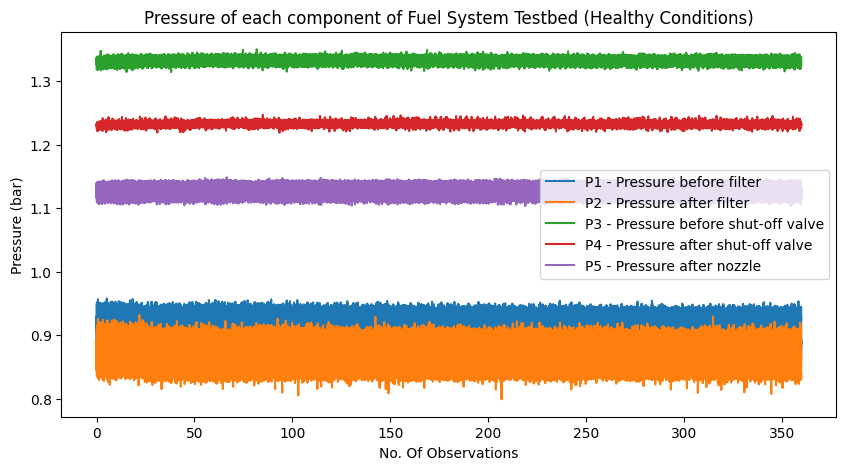

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(df['X_Value'], df['P1'], label='P1 - Pressure before filter')
plt.plot(df['X_Value'], df['P2'], label='P2 - Pressure after filter')
plt.plot(df['X_Value'], df['P3'], label='P3 - Pressure before shut-off valve')
plt.plot(df['X_Value'], df['P4'], label='P4 - Pressure after shut-off valve')
plt.plot(df['X_Value'], df['P5'], label='P5 - Pressure after nozzle')

plt.xlabel('No. Of Observations')
plt.ylabel('Pressure (bar)')
plt.title('Pressure of each component of Fuel System Testbed (Healthy Conditions)')
plt.legend()
plt.show()

#Pressure Distributions(Healthy Conditions)

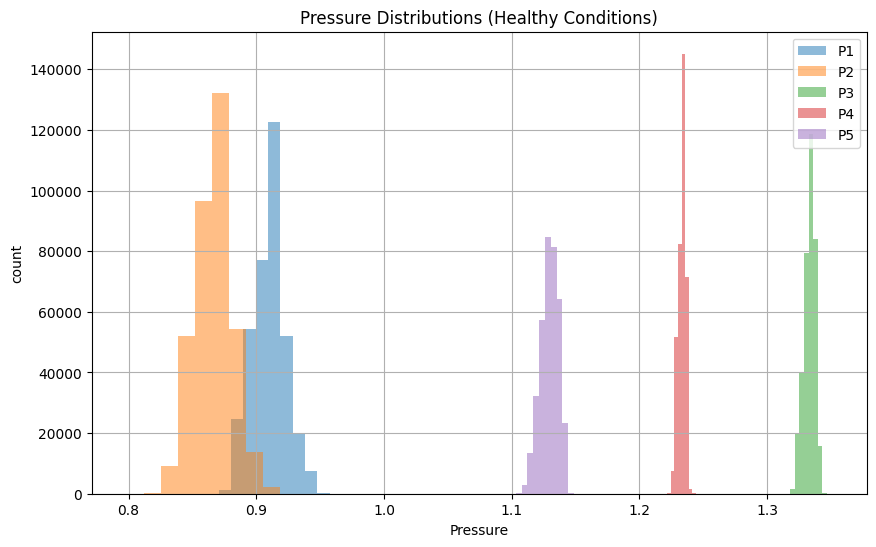

In [ ]:
columns = ['P1','P2','P3','P4','P5']
plt.figure(figsize=(10, 6))

for column in columns:
  plt.hist(df[column], alpha=0.5, label=column)

plt.xlabel('Pressure')
plt.ylabel('count')
plt.title('Pressure Distributions (Healthy Conditions)')
plt.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

#Pressure Distributions (For Faulty Conditions) - Histograms
Clogged Filter fault condition (clogged filter datasets are used) is shown over here as example.




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


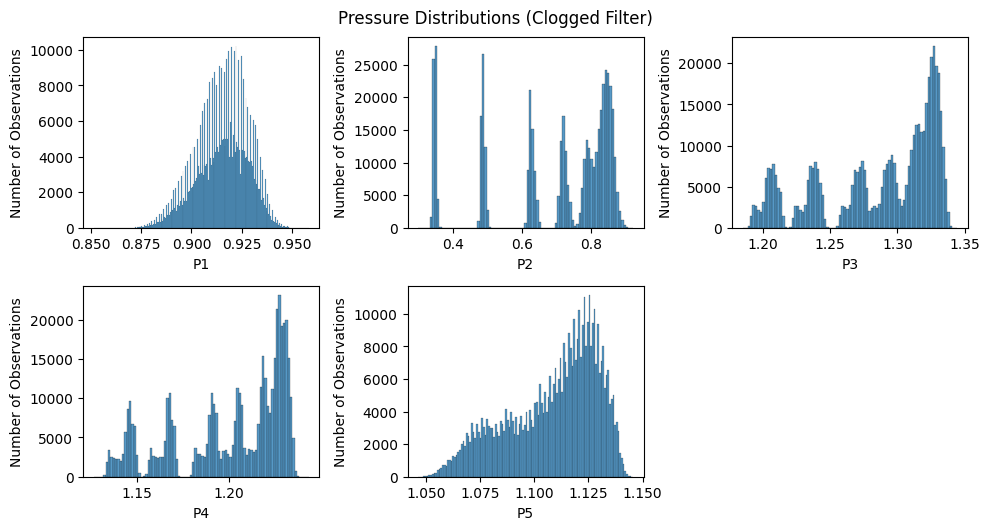

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount ('/content/drive')
folder_path = ('/content/drive/MyDrive/data/clogged filter')     #changing the path (using clogged filter data)
file_list = os.listdir(folder_path)
dfs = []
for file_name in file_list:
  file_path = os.path.join(folder_path, file_name)

  if file_name.endswith('.lvm'):
    dataframe = pd.read_csv(file_path, delimiter='\t', skiprows=23)
    dfs.append(dataframe)
df = pd.concat(dfs, ignore_index = True)

df = df.rename(columns={'Pre-Filter Pressure Transducer' : 'P1', 'Post Filter Pressure Transducer' : 'P2', 'Pre Valve Pressure Transducer' : 'P3', 'Post Valve Pressure Transducer' : 'P4','End Pressure' : 'P5'})
df['P3'] += 1.01325 #Converting relative pressures to absolute pressures
df['P4'] += 1.01325
df['P5'] += 1.01325
cont_features = ['P1','P2','P3','P4','P5']
fig = plt.figure(figsize=(10,10))
plt.suptitle('Pressure Distributions (Clogged Filter)', fontsize=12)
initializer = 1
for feature in cont_features:
  plt.subplot(4, 3, initializer)
  plt.ylabel('Number of Observations')
  plt.xlabel('')
  sns.histplot(data=df, x=feature, kde= False)
  initializer+=1
plt.tight_layout()
plt.show()

#Valve Opening % Vs Pressures at each Pressure points - Line Plot

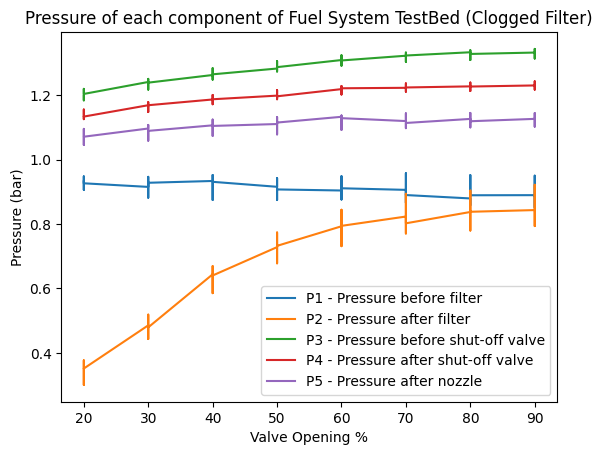

In [9]:
plt.plot(df['Untitled 1'], df['P1'], label='P1 - Pressure before filter')
plt.plot(df['Untitled 1'], df['P2'], label='P2 - Pressure after filter')
plt.plot(df['Untitled 1'], df['P3'], label='P3 - Pressure before shut-off valve')
plt.plot(df['Untitled 1'], df['P4'], label='P4 - Pressure after shut-off valve')
plt.plot(df['Untitled 1'], df['P5'], label='P5 - Pressure after nozzle ')

# Customize plot labels and title
plt.xlabel('Valve Opening %')
plt.ylabel('Pressure (bar)')
plt.title('Pressure of each component of Fuel System TestBed (Clogged Filter)')
plt.legend()
# Adjust legend position to the upper left and outside the plot
#plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

#Pressure after the filter Vs Valve Opening Percentage - Bar Plot


                  P1        P2        P3        P4        P5
Untitled 1                                                  
20.0        0.927166  0.348572  1.204729  1.143514  1.072220
30.0        0.924856  0.488062  1.236170  1.165548  1.086581
40.0        0.922563  0.629315  1.270021  1.189298  1.102230
50.0        0.910922  0.722605  1.292191  1.203909  1.110435
60.0        0.911518  0.791731  1.310590  1.217109  1.119180
70.0        0.912597  0.831879  1.321538  1.225125  1.124719
80.0        0.905208  0.845094  1.326347  1.228488  1.126451
90.0        0.908142  0.858261  1.330661  1.231662  1.128569


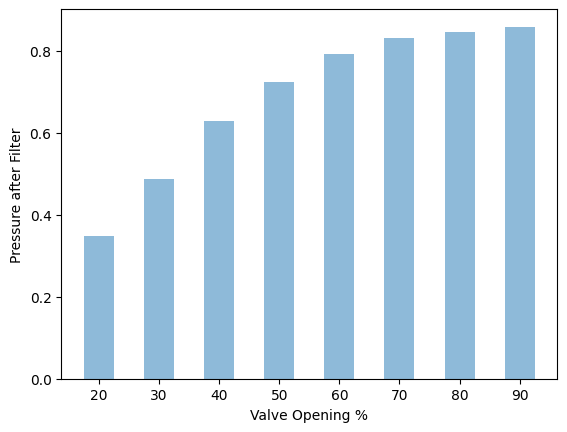

In [ ]:
required_columns = ['P1','P2','P3','P4','P5','Untitled 1']
selected_df = df[required_columns]
mean_values = selected_df.groupby('Untitled 1').mean() #calculating the average data points with respect to each valve opening %
print(mean_values)
mean_values.describe()
bar_width = 5
plt.bar(mean_values.index, mean_values['P2'],width = bar_width, align='center', alpha=0.5)
plt.xlabel('Valve Opening %')
plt.ylabel('Pressure after Filter')
plt.show()

#Pressure Difference (P3 - P2) Vs Volumetric Flow (All Data)- Scatter Plot/Line Plot


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0, 0.5, 'Volumetric Flow Rate')

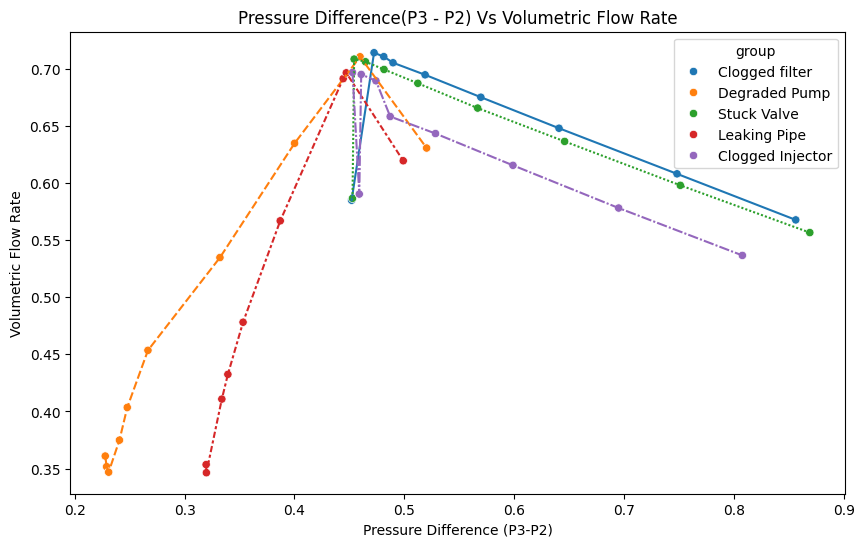

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount ('/content/drive')
folder_path = ('/content/drive/MyDrive/data/All data') #All data sets are used
file_list = os.listdir(folder_path)
dfs = []
for file_name in file_list:
  file_path = os.path.join(folder_path, file_name)

  if file_name.endswith('.lvm'):
    dataframe = pd.read_csv(file_path, delimiter='\t', skiprows=23)
    dfs.append(dataframe)
df = pd.concat(dfs, ignore_index = True)
#renaming the columns for better understanding
df = df.rename(columns={'Pre-Filter Pressure Transducer' : 'P1', 'Post Filter Pressure Transducer' : 'P2', 'Pre Valve Pressure Transducer' : 'P3', 'Post Valve Pressure Transducer' : 'P4','End Pressure' : 'P5','Untitled 1':'Valve Opening%-cloggedfilter','Untitled 2':'Valve Opening%-degradedpump','Untitled 3':'Valve Opening%-stuckvalve','Untitled 4':'Valve Opening%-leakingpipe','Untitled 5':'Valve Opening%-cloggedinjector'})
df['P3'] += 1.01325 #Converting relative pressures to absolute pressures
df['P4'] += 1.01325
df['P5'] += 1.01325
selected_df = ['P3','P2','Valve Opening%-cloggedfilter','Valve Opening%-degradedpump','Valve Opening%-stuckvalve','Valve Opening%-leakingpipe','Valve Opening%-cloggedinjector','Sump Tank Flow Meter']
required_df = df [selected_df]
mean_cloggedfilter = required_df.groupby('Valve Opening%-cloggedfilter').mean()
mean_cloggedfilter['group']= 'Clogged filter'
mean_degradedpump = required_df.groupby('Valve Opening%-degradedpump').mean()
mean_degradedpump['group'] = 'Degraded Pump'
mean_stuckvalve = required_df.groupby('Valve Opening%-stuckvalve').mean()
mean_stuckvalve['group'] = 'Stuck Valve'
mean_leakingpipe = required_df.groupby('Valve Opening%-leakingpipe').mean()
mean_leakingpipe['group'] = 'Leaking Pipe'
mean_cloggedinjector = required_df.groupby('Valve Opening%-cloggedinjector').mean()
mean_cloggedinjector['group'] = 'Clogged Injector'
combined_df = pd.concat([mean_cloggedfilter, mean_degradedpump, mean_stuckvalve, mean_leakingpipe, mean_cloggedinjector])
combined_df['Difference'] = combined_df['P3'] - combined_df['P2']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Difference', y='Sump Tank Flow Meter', hue = 'group')
sns.lineplot(data=combined_df, x ='Difference', y= 'Sump Tank Flow Meter', hue = 'group', style='group', legend=False )
plt.title('Pressure Difference(P3 - P2) Vs Volumetric Flow Rate')
plt.xlabel('Pressure Difference (P3-P2)')
plt.ylabel('Volumetric Flow Rate')
